# TP4: Résolution numérique de l'équation $f(x)=0$

## Objectifs: 
L'objectif de ce TP est de :  
 
 - Implémenter les méthodes de dichotomie et de Newton pour calculer une approximation de la solution de l'équation $f(x)=0$.
 
 - Comparer les deux méthodes de résolution numérique.


## 1) Méthode de Dichotomie :
### Contexte du travail :

On suppose que :  
i. $f$ est continue sur $[a, b]$.  
ii. $f(a).f(b)<0 $ sur l'intervalle $[a,b]$.  
iii. $f$ est strictement monotone sur $[a, b]$.  
Ces hypothèses suffisent à garantir que $f$ s’annule une seule fois sur $]a, b[$.  
### Démarche :  
Technique à répéter :   
i. On divise l’intervalle $[a, b]$ en deux, et on ne garde que la section qui contient la solution.  
Pour cela, on examine le signe de $f(\displaystyle\frac{a+b}{2})$.    
Si $f(a)$ et $f(\displaystyle\frac{a+b}{2})$ sont de signes contraires, on se place alors sur $[a,\displaystyle\frac{a+b}{2}]$ sinon il faudra travailler sur $[\displaystyle\frac{a+b}{2},b]$.  
ii. Puis on recommence.  
### Condition d’arrêt :  
Plusieurs conditions peuvent justifier l’arrêt des itérations décrites précédemment :  
i. Lorsque la taille de notre intervalle de travail est « suffisamment petite » l’écart entre le milieu de cet intervalle et $x^*$, la solution exacte, est encore plus petit.  
ii. Lorsqu’on estime que le nombre d’itérations est suffisant. Le dernier milieu calculé sera alors considéré comme une approximation de $x^*$.  

### vitesse de convergence :  
Comme, à chaque étape, la taille de l’intervalle de travail est divisée par 2, l’intervalle de recherche à la n-ième étape est de longueur $\displaystyle\frac{b − a}{2^{n}}$. Ainsi, le milieu de cet intervalle est alors distant de $x^*$ d’au plus $\displaystyle\frac{b − a}{2^{n}}$.

## Programmation:

 Écrire une fonction `dichotomie(f,a,b,epsilon,Nmax)` qui renvoie la valeur approchée du zéro $x^*$  d’une fonction $f$ continue, strictement monotone  sur  $[a, b]$, selon la méthode de dichotomie , et  renvoie aussi le nombre d'itérations. 
 
• Les arguments de la fonction `dichotomie` devront être: la fonction $f$, des réels $a$ et $b$, avec $a<b$, 
un réel $\varepsilon > 0$ et $Nmax$ le nombre maximal d'itérations.  

• Le résultat renvoyé doit être composé d'une valeur approchée de $x^*$ à $\varepsilon$ près et le nombre d'itérations.  

• On testera au préalable si $f(a)f(b) > 0$, et dans ce cas, on renverra $f(a)$ et $f(b)$ ne sont pas de même signe.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [3]:
def dichotomie(f,a,b,epsilon,Nmax):
    k=0# un compteur pour calculer le nombre des itérations
    if f(a)*f(b)>0:# Tester les conditions de TVI
        print("f(a) et f(b) sont de même signe") # Pas de bonnes conditions pour le TVI
    else:
        while (b-a>epsilon) and (k<= Nmax):
            c=(a+b)/2 # distinguer le milieu de l'intervalle
            if f(a)*f(c)<0:# test
                b=c # on garde que l'intervalle [a,(a+b)/2]
               
            elif f(c)==0:# c est bien la solution cherchée
                a=c
                b=c
            else:# on garde que l'intervalle [(a+b)/2,b]
                a=c
            k+=1 # incrémentation du compteur
        return ((a+b)/2,k)# retourner un tuple qui contient la solution approchée et le nombre d'itérations necessaires.
            


***Application 1 :***  

Tester la fonction `dichotomie(f,a,b,epsilon,Nmax)` pour :
$a=1, b=2, \varepsilon=10^{-5}, f(x)=x^{2}-2$ et $Nmax=20$.



In [4]:
a=1
b=2
epsilon=10**(-5)
f=lambda t: t**2-2
Nmax=20
print(dichotomie(f,a,b,epsilon,Nmax))

(1.4142112731933594, 17)


***Remarque : La fonction dichotomie est déjà implémentée sous Python par la fonction bisect du module
scipy.optimize.***

# 2) Méthode de Newton :


## Théorème :
Soit $f:[a,b]\rightarrow \mathbb{R}$ une fonction de classe $\mathcal{C}^2$ sur $[a,b]$ et vérifiant :

$1.\quad f(a).f(b)<0$.

$2.\quad f^{\prime}(x)\neq 0, \quad \forall x\in [a,b]$.

$3. \quad f^{\prime \prime}(x)\neq 0, \quad \forall x\in [a,b]$.

Alors pour tout $ x_{0} \in [a,b]$ vérifiant   $ f(x_{0}).f^{\prime \prime}(x_{0}) > 0 $, la suite $(x_{n})_{n\geq 0}$ définie par :

$$ x_{n+1}=x_{n}-\frac{f(x_{n})}{f^{\prime}(x_{n})}$$

converge vers la solution $x^*$ de l'équation $f(x)=0$.


## Interprétation géometrique : 
On considère une fonction $f$ vérifiant les hypothèses du théorème ci-dessus et l'equation 
$$f(x)=0, \quad \forall x\in [a,b].$$  
#### La méthode consiste à prendre une valeur initiale $x_{0}\in[a,b]$, et construire une suite récurrente $(x_n)_{n\geq0}$ qui converge vers la solution de l'équation $x^*$.
$x_{n+1}$ est l'abscisse du point d'intersection de la tangente $T_{(x_{n},f(x_{n}))}$ à la courbe de $f$ au point d'abscisse $x_{n}$ et l'axe des abscisses $\Delta:y=0$.

$$M(x_{n+1},0) \in (\Delta:y=0)\cap T_{(x_{n},f(x_{n}))}$$


## Condition de convergence :
Une fois construite, la suite $(x_n)$ convergente vers $x^*$, on considère une tolérance $\varepsilon$ fixée et on désire déterminer une valeur approchée de $x^*$ avec la tolérance $\varepsilon$.

On définit l'erreur absolue à l'étape $k$ par:
$$e_k=|x_k-x^*|$$ 

Pour avoir une valeur approchée de $x^*$ à $\varepsilon$ près on s'arrête à l'itération $k$ dès que:
$$|x_{k+1}-x_{k}|<\varepsilon $$

Il existe aussi d'autres critères d'arrêt et on cite comme exemple:
$$|f(x_{k}| \leq \varepsilon,\qquad. $$


## Programmation :  
**Dérivation analytique d'une fonction sous la module `sumpy`** 

Avant de programmer l'algorithme de Newton, nous expliquons, à travers les lignes de codes ci-dessous, comment dériver une fonction `f` analytiquement sous le module `sympy`. Pour ce faire, nous utilisons comme exemple la fonction $\displaystyle f(x)=e^{-x}-x$.


In [5]:
x=sp.symbols('x') # la variable symbolique
f=sp.Lambda(x,sp.exp(-x)-x) # expression symbolique de f : la fonction f en fonction de x
df=sp.Lambda(x,sp.diff(f(x),x)) # expression symbolique de f' : la fonction dérivée en fonction de x
# Evaluer f et df au point 2
print('l\'expression symbolique de f(2) est f(2)=', f(2))
print('la valeur numérique de f(2) est f(2)=', f(2).evalf())
print('l\'expression symbolique de f\'(2) est f\'(2)=', df(2))
print('la valeur numérique de f\'(2) est f\'(2)=', df(2).evalf())

l'expression symbolique de f(2) est f(2)= -2 + exp(-2)
la valeur numérique de f(2) est f(2)= -1.86466471676339
l'expression symbolique de f'(2) est f'(2)= -1 - exp(-2)
la valeur numérique de f'(2) est f'(2)= -1.13533528323661


**Méthode de Newton**  

Ecrire une fonction `Newton(x,f,df,epsilon, Nmax)` qui renvoie :   
1. la valeur approchée de la solution $x^*$ de $f$ à une tolérance `epsilon` près.
2. le nombre d'itérations effectué $k$ pour atteindre la convergence.  


On arrêtera l'algorithme après un nombre maximal d'itérations `Nmax`. L'argument `df` désigne la dérivée analytique de `f`.



In [6]:
def Newton(x,f,df,epsilon,Nmax):#x est la valeur initiale de la suite $x_n$.
    E=[abs(f(x)/df(x)).evalf()]
    k=1
    while (E[-1]>epsilon) and (k<Nmax):
        k=k+1
        x=x-(f(x)/df(x))
        E.append(abs(f(x)/df(x)).evalf())
    return x.evalf(),k

***Application 2 :***  

 Tester la fonction `Newton(x,f,df,epsilon,Nmax)` pour :
$a=1, b=2, \varepsilon=10^{-5}, f(x)=x^{2}-2$ et $Nmax=20$.  
Choisir un $x_0$ garantissant la convergence de la méthode de Newton.



In [7]:
Nmax=20
x=sp.symbols('x')
f=sp.Lambda(x,x**2-2)
df=sp.Lambda(x,sp.diff(f(x),x))
epsilon=10**(-3)

In [8]:
Newton(1,f,df,epsilon,Nmax)

(1.41421568627451, 4)

## Comparaison des deux méthodes:

Le but de cette partie est de comparer les deux méthodes de résolution de $f(x)=0$ : dichotomie et Newton, en terme de nombre d'itérations effectuées, pour approcher la solution $x^*$ de la fonction $f(x)=cos(2x)-x^2$ sur l'intervalle $\displaystyle [0,\frac{\pi}{4}]$.  

1. Représenter la fonction $f$ sur $\displaystyle [0,\frac{\pi}{4}]$ et vérifier graphiquement l'unicité de la racine $x^*$ sur cet intervalle. Déduire graphiquement le signe de $f'$ et $f''$, respectivement, la dérivée première et seconde de $f$.  

2. Pour $Nmax=10^3$, et $\varepsilon\in\{10^{-n},\;2\leq n\leq 8\} $, représenter l'évolution du nombre d'itérations effectuées, par les deux méthodes, pour approcher $x^*$, en fonction de la valeur de la précision $\varepsilon$. Faire une lecture graphique des résultats obtenus.


*Question 1 :*

In [9]:
Nmax=10**3
a=0
b=np.pi/4
epsilon=1/10**np.arange(2,9)
x0=np.pi/4
x=sp.symbols('x')
f=sp.Lambda(x,sp.cos(2*x)-x**2)
df=sp.Lambda(x,sp.diff(f(x),x))
It_D=[]
It_N=[]
for eps in epsilon:
    It_D.append(dichotomie(f,a,b,eps,Nmax)[1])#nbre d'itération pour avoir la solution à epsilon prés 
    It_N.append(Newton(x0,f,df,eps,Nmax)[1])

*Question 2 :*

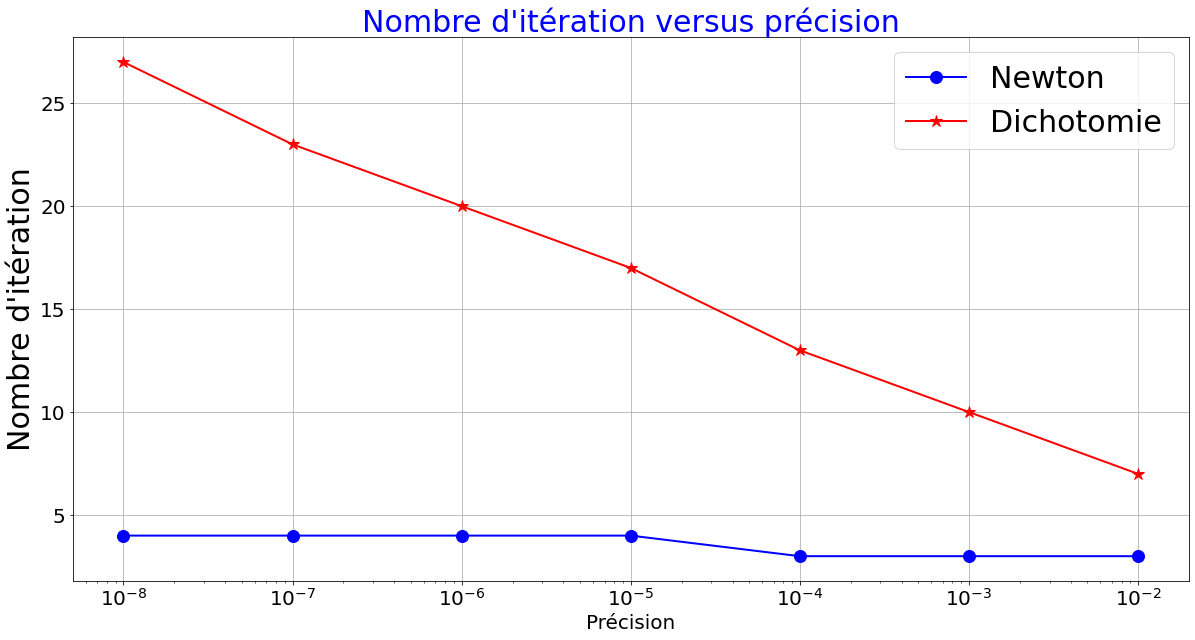

In [10]:
plt.figure(figsize=(20,10))
plt.plot(epsilon,It_N,'bo-',epsilon,It_D,'r*-',markersize=12,linewidth=2)
plt.xscale('log')#axis scaling 
plt.grid(True)
plt.ylabel('Nombre d\'itération',fontsize=30)
plt.xlabel('Précision',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Nombre d\'itération versus précision", fontsize=30, color='blue')
plt.legend(('Newton','Dichotomie'), loc=0, fontsize=30)
plt.show()

## Application (Asynchrone):

Le client d'une banque dépose au début de chaque année $v$ euros dans un fond d'investisement et en retire, à la fin de la n-ème année, un capital de M euros. Nous voulons calculer le taux d'interet annuel moyen $T$ de cet investisement.  Comme $M$ est reliée à $T$ par la relation suivante :
$$ M= v\displaystyle\sum_{k=1}^{k=n}(1+T)^{k}=v\displaystyle\frac{1+T}{T}[(1+T)^{n}-1],$$
nous déduisons que $T$ est une racine de l'équation $f(T)=0$ où  $f(T)=M-v\displaystyle\frac{1+T}{T}[(1+T)^{n}-1].$   
En supposant que $v=1000$ euros et qu'après $5$ ans $M$ sera égal à $6000$ euro,
1. Tracer le graphe de la fonction $f$ dans $[0.01,0.3]$.  
2. Déterminer le taux d'interet $T$ par les deux méthodes programmées dans ce TP.

 

# Références  

[1] [Kiusalaas, J. (2013). Numerical methods in engineering with Python 3. Cambridge university press.](https://books.google.tn/books?hl=fr&lr=&id=YlkgAwAAQBAJ&oi=fnd&pg=PP10&dq=numerical+methods+in+engineering+&ots=-42y60OrWf&sig=wxL2oISNUKKPlvgH4-tsYh1RK9o&redir_esc=y#v=onepage&q=numerical%20methods%20in%20engineering&f=false)  
[2] [Numpy Package](https://numpy.org/devdocs/user/quickstart.html)  
[3] [Mathplotlib Package](https://matplotlib.org/tutorials/index.html#introductory)  
[4] [Jupyter markdowns](http://faccanoni.univ-tln.fr/user/enseignements/20182019/M62-CM1.pdf)  
[5] [Sympy Package](https://www.sympy.org/en/index.html)